# Initialization

###### Inport modules

In [1]:
%matplotlib inline
import os, sys
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
from tqdm.notebook import tqdm

from time import sleep, monotonic, time


import qcodes as qc
from qcodes import Parameter

from qcodes.dataset.plotting import plot_dataset, plot_by_id
from qcodes.utils.metadata import diff_param_values
from qcodes.instrument.specialized_parameters import ElapsedTimeParameter
from qcodes.dataset.measurements import Measurement

# sys.path.append('M:\\tnw\\ns\\qt\\2D Topo\\code\\qcodes')
sys.path.append('C:\\qcodes')
from sweeps import do1d, do2d, time_sweep, measure_until, do1d_until

import warnings
warnings.filterwarnings('ignore')

In [2]:
fridge_name = 'BF1'
# %run ..\..\..\..\..\code\qcodes\init_fridge.py {fridge_name}
# %run ..\..\init_fridge.py {fridge_name}
%run C:\\qcodes\\init_fridge.py {fridge_name}

[keithley_24(Keithley2400)] Snapshot: Could not update parameter: volt


Connected to: KEITHLEY INSTRUMENTS DMM6500 (serial:04518052, firmware:1.7.7b) in 0.20s
Connected to: KEITHLEY INSTRUMENTS INC. 2440 (serial:1225508, firmware:C30   Mar 17 2006 09:29:29/A02  /B/A) in 0.04s


[keithley_24(Keithley2400)] Snapshot: Could not update parameter: curr
[keithley_24(Keithley2400)] Snapshot: Could not update parameter: resistance
[keithley_19(Keithley2400)] Snapshot: Could not update parameter: volt
[keithley_19(Keithley2400)] Snapshot: Could not update parameter: curr
[keithley_19(Keithley2400)] Snapshot: Could not update parameter: resistance


Connected to: KEITHLEY INSTRUMENTS INC. 2400 (serial:0957985, firmware:C32   Oct  4 2010 14:20:11/A02  /K/M) in 0.03s


In [3]:
snapshot_of_station = station.snapshot()
pprint(snapshot_of_station)

{'components': {},
 'config': None,
 'instruments': {'keithley1': {'__class__': 'qcodes.instrument_drivers.tektronix.Keithley_6500.Keithley_6500',
                               'address': 'GPIB0::6::INSTR',
                               'functions': {},
                               'label': 'keithley1',
                               'name': 'keithley1',
                               'parameters': {'IDN': {'__class__': 'qcodes.parameters.parameter.Parameter',
                                                      'full_name': 'keithley1_IDN',
                                                      'instrument': 'qcodes.instrument_drivers.tektronix.Keithley_6500.Keithley_6500',
                                                      'instrument_name': 'keithley1',
                                                      'inter_delay': 0,
                                                      'label': 'IDN',
                                                      'name': 'IDN',
               

##  DAC range(K213)

In [ ]:
keithley_1.averaging_enabled(False)

In [ ]:
magnet_y.current_limit()

In [ ]:
K213.voltage1(0)
K213.voltage2(0)
K213.voltage3(0)
K213.voltage4(0)
#you can choose the DAC range by setting to a specific value
K213.vrange1(3) #0(0V), 1(1V), 2(5V), 3(10V)
K213.vrange2(3) #0(0V), 1(1V), 2(5V), 3(10V)
K213.vrange3(3) #0(0V), 1(1V), 2(5V), 3(10V)
K213.vrange4(3) #0(0V), 1(1V), 2(5V), 3(10V)

In [ ]:
K213.voltage1(1e-3)

## DAC Kei 2440

### sensitive check

In [4]:
keithley_24.mode()

'VOLT'

In [5]:
keithley_24.output(1) # output on
keithley_24.rangev(10)
keithley_24.volt(0)
keithley_24.compliancei(100e-3)
# keithley_24.output(0) #output off
sleep(1)
v_read=keithley1.amplitude()
print(v_read)

-0.001090295


In [6]:
keithley_24.volt(0)
keithley_24.output(0) #output off

In [7]:
keithley_24.rangev(10)
keithley_24.rangev()

10.5

In [ ]:
keithley_24.rangev()

## TG 2400

In [8]:
keithley_19.output(1) # output on
keithley_19.rangev(22)
keithley_19.volt(0)
keithley_19.compliancei(100e-3)
# keithley_24.output(0) #output off
sleep(1)
v_read=keithley1.amplitude()
print(v_read)

-0.001102316


In [9]:
keithley_19.volt(1)
keithley_19.output(0) #output off

In [10]:
keithley_19.rangev(22)
keithley_19.rangev()

210.0

##  Database initialisation

In [11]:
reuse = True
%run ..\..\init_database.py {reuse}

Using existing database file:
C:\qcodes\personal_scripts\data\qcodes_personal_scripts_2024-03-27_01.db



# Scaled parameters

In [12]:
from qcodes import ManualParameter, ScaledParameter

## Defining scaled parameters

In [13]:
Irange = Parameter('Irange', label='current range', unit='', set_cmd=None, get_cmd=None)
Vrange = Parameter('Vrange', label='voltage range', unit='', set_cmd=None, get_cmd=None)
TGrange = Parameter('TGrange', label='Top gate range', unit='', set_cmd=None, get_cmd=None)

#division paraemtrs required for simplier update: they used as an argument for scaled paraemtrs of sorce instruments

# Irange_division = Parameter('Irange_division', 
#                             label='scaled current range', unit='', 
#                             set_cmd=None, get_cmd=lambda : 100 / Irange())

Irange_division = Parameter('Irange_division', 
                            label='scaled current range', unit='', 
                            set_cmd=None, get_cmd=lambda : 1 / Irange())

Vrange_division = Parameter('Vrange_division', 
                            label='scaled voltage range', unit='', 
                            set_cmd=None, get_cmd=lambda : 100 / Vrange())

TGrange_division = Parameter('TGrange_division', 
                             label='scaled Top gate range', unit='', 
                             set_cmd=None, get_cmd=lambda : 1 / TGrange())

Irange_AC_division = Parameter('Irange_AC_division', 
                               label='scaled current range for lockin', unit='', 
                               set_cmd=None, get_cmd=lambda : 1000 / Irange())

Vrange_AC_division = Parameter('Vrange_AC_division', 
                               label='scaled voltage range for lockin', unit='', 
                               set_cmd=None, get_cmd=lambda : 1000 / Vrange())

Gain_K1 = Parameter('Gain_K1', label='Gain K1', unit='', set_cmd=None, get_cmd=None)
Gain_K2 = Parameter('Gain_K2', label='Gain K2', unit='', set_cmd=None, get_cmd=None)
Gain_L1 = Parameter('Gain_L1', label='Gain L1', unit='', set_cmd=None, get_cmd=None)
Gain_L2 = Parameter('Gain_L2', label='Gain L2', unit='', set_cmd=None, get_cmd=None)

#Add components
station.add_component(Irange)
station.add_component(Vrange)
station.add_component(TGrange)

station.add_component(Irange_division)
station.add_component(Vrange_division)
station.add_component(TGrange_division)

station.add_component(Irange_AC_division)
station.add_component(Vrange_AC_division)
                             
station.add_component(Gain_K1)
station.add_component(Gain_K2)
station.add_component(Gain_L1)
station.add_component(Gain_L2)

'Gain_L2'

## Parameters - update here during measuerements

In [14]:
Irange.set(1e-6)
Vrange.set(2) ## need to be sync with K213 range
TGrange.set(1)
Gain_K1.set(100)
Gain_K2.set(100)
# Gain_K3.set(1e2)
Gain_L1.set(Gain_K1())
Gain_L2.set(Gain_K2())
#division parameters are updated automatically

## DC parameters

In [15]:
# appl_current = ScaledParameter(ivvi.dac1, division = Irange_division, name = 'appl_current', unit = 'A')
appl_current = ScaledParameter(keithley_24.volt, division = Irange_division, name = 'appl_current', unit = 'A')
# for K213
# appl_current = ScaledParameter(K213.voltage1, division = Irange_division, name = 'appl_current', unit = 'A')
# appl_voltage = ScaledParameter(K213.voltage2, division = Vrange_division, name = 'appl_voltage', unit = 'V')
appl_TG = ScaledParameter(keithley_19.volt, division = TGrange_division, name = 'appl_TG', unit = 'V')

# meas_voltage_K1 = ScaledParameter(keithley_1.amplitude, division = Gain_K1, name = 'meas_voltage_K1', unit = 'V')
meas_voltage_K2 = ScaledParameter(keithley1.amplitude, division = Gain_K2, name = 'meas_voltage_K2', unit = 'V')

#meas_leakage = ScaledParameter(keithley_2.amplitude, division = Gain_K2, name = 'meas_leakage', unit = 'A')

# meas_current_K1 = ScaledParameter(keithley_1.amplitude, division = Gain_K1, name = 'meas_current_K1', unit = 'A')
meas_current_K2 = ScaledParameter(keithley1.amplitude, division = Gain_K2, name = 'meas_current_K2', unit = 'A')

station.add_component(appl_current)
# station.add_component(appl_voltage)
station.add_component(appl_TG)
#station.add_component(meas_voltage_K1)
station.add_component(meas_voltage_K2)
#station.add_component(meas_leakage)
# station.add_component(meas_current_K1)
station.add_component(meas_current_K2)

'meas_current_K2'

In [16]:
keithley_24.output(0)
appl_current(0)
sleep(1)
# meas_voltage_K2()

##  AC parameters

In [ ]:
appl_current_AC = ScaledParameter(lockin_1.amplitude, division = Irange_AC_division, name = 'appl_current_AC', unit = 'A')
appl_voltage_AC = ScaledParameter(lockin_1.amplitude, division = Vrange_AC_division, name = 'appl_voltage_AC', unit = 'V')

station.add_component(appl_current_AC)
station.add_component(appl_voltage_AC)

meas_voltage_AC_L1 = ScaledParameter(lockin_1.X, division = Gain_L1, name = 'meas_voltage_Lockin1', unit = 'V')
meas_current_AC_L1 = ScaledParameter(lockin_1.X, division = Gain_L1, name = 'meas_current_Lockin1', unit = 'A')
meas_phase_AC_L1 = ScaledParameter(lockin_1.P, division = 1, name = 'meas_phase_Lockin1', unit = 'degree')


# meas_voltage_AC_L2 = ScaledParameter(lockin_2.X, division = Gain_L2, name = 'meas_voltage_Lockin2', unit = 'V')
# meas_current_AC_L2 = ScaledParameter(lockin_2.X, division = Gain_L2, name = 'meas_current_Lockin2', unit = 'A')
# meas_phase_AC_L2 = ScaledParameter(lockin_2.P, division = 1, name = 'meas_phase_Lockin1', unit = 'degree')

station.add_component(meas_voltage_AC_L1)
station.add_component(meas_current_AC_L1)
station.add_component(meas_phase_AC_L1)

# station.add_component(meas_voltage_AC_L2)
# station.add_component(meas_current_AC_L2)

meas_voltage_AC_L1_R = ScaledParameter(lockin_1.R, division = Gain_L1, name = 'meas_voltage_R_Lockin1', unit = 'V')
# meas_voltage_AC_L2_R = ScaledParameter(lockin_2.R, division = Gain_L2, name = 'meas_voltage_R_Lockin2', unit = 'V')

station.add_component(meas_voltage_AC_L1_R)
# station.add_component(meas_voltage_AC_L2_R)

In [ ]:
meas_voltage_AC_L1_P = ScaledParameter(lockin_1.P, division = 1, name = 'meas_voltage_Lockin1_P', unit = 'degree')
meas_current_AC_L1_P = ScaledParameter(lockin_1.P, division = 1, name = 'meas_current_Lockin1_P', unit = 'degree')

# meas_voltage_AC_L2_P = ScaledParameter(lockin_2.P, division = 1, name = 'meas_voltage_Lockin2_P', unit = 'degree')
# meas_current_AC_L2_P = ScaledParameter(lockin_2.P, division = 1, name = 'meas_current_Lockin2_P', unit = 'degree')

station.add_component(meas_voltage_AC_L1_P)
station.add_component(meas_current_AC_L1_P)

# station.add_component(meas_voltage_AC_L2_P)
# station.add_component(meas_current_AC_L2_P)

## Another useful example: magnet using dac (Janis)

>2231.2 G per A => 0.22312 T per A<br>
I source 10mA per V => 1e-5 A per 1mV<br>
result: 0.22312 T/A * 1e-5 A/mV

In [17]:
def get_R_from_IV(dataid):
    dataset = qc.load_by_id(dataid)

    voltage = dataset.get_parameter_data()['meas_voltage_K2']['meas_voltage_K2']
    current = dataset.get_parameter_data()['meas_voltage_K2']['appl_current']
    fit_values = np.polyfit(current,voltage,1)
    
    return fit_values[0]

def get_R_from_IV_2(dataid):
    dataset = qc.load_by_id(dataid)

    voltage = dataset.get_parameter_data()['meas_voltage_K2']['meas_voltage_K2']
    current = dataset.get_parameter_data()['meas_voltage_K2']['appl_current']
    fit_values = np.polyfit(current,voltage,1)
    
    return fit_values[0]

# Simple IVs

## IV

In [ ]:
#magnet_y.field()

Starting experimental run with id: 44. 


  0%|          | 0/101 [00:00<?, ?it/s]

Trying to mark a run completed that was already completed.


709.7703934769949


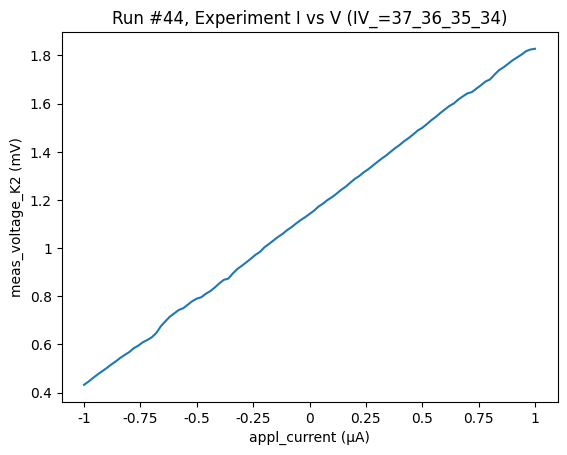

In [41]:
keithley_24.output(1)
appl_current(-1e-6)
sleep(5)
# station.snapshot(update=True);
exp = qc.new_experiment('I vs V', sample_name='IV_=37_36_35_34')
#d_o1d(param_set, start, stop, num_points, delay, *param_meas)

dataid = do1d(appl_current,-1e-6 ,1e-6, 101, 0.05, meas_voltage_K2)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()

appl_current(0)
plot_by_id(dataid)
# print(get_R_from_IV(dataid))
#print(get_R_from_IV_2(dataid))


keithley_24.output(0)
print(get_R_from_IV_2(dataid))

In [ ]:
keithley_24.output(1)
appl_current(0.0e-6)
keithley_24.output(0)
#appl_current(0e-6)

In [ ]:
runid=8
print(get_R_from_IV_2(runid))

## 加TG (1D)

In [ ]:
keithley_19.output(1)
appl_TG(0)

In [ ]:
keithley_19.output(1)
keithley_24.output(1)
appl_TG(40)
sleep(3)
appl_current(-1e-6)
sleep(1)

# station.snapshot(update=True);
exp = qc.new_experiment('IV', sample_name='40_IV_26_14_29_30_TG_32')

#do1d(param_set, start, stop, num_points, delay, *param_meas)
dataid = do1d(appl_current, -1e-6 ,1e-6, 101, 0.05, meas_voltage_K2)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()

keithley_19.output(0)
keithley_24.output(0)
appl_current(0)
plot_by_id(dataid)
#print(get_R_from_IV(dataid))
# print(get_R_from_IV_2(dataid))


## 歸零


In [ ]:
#keithley_19.output(1)
keithley_24.output(1)

appl_current(0)
sleep(1)
#appl_TG(0)
sleep(5)

#keithley_19.output(0)
keithley_24.output(0)

# Magnetic field

## IV vs Bx

In [ ]:
keithley_24.rangev()

In [ ]:
keithley_24.volt(0)
keithley_24.output(1) #output off
sleep(1)
appl_current(1.5e-6)
sleep(2)
meas_voltage_K2()

In [ ]:
keithley_24.output(1)
sleep(2)
magnet_x.field(-5e-3)
appl_current(-0.8e-6)
sleep(5)

# station.snapshot(update=True);

exp = qc.new_experiment('IV vs Bx', sample_name='IV_Bx_-5to-30mT')

dataid = do2d(magnet_x.field, -5e-3, -30e-3, 4001, 1, appl_current, -0.8e-6 ,1e-6, 101, 0.01, meas_voltage_K2)

appl_current(0)
# magnet_x.field(0)

plot_by_id(dataid)

keithley_24.output(0)
#keithley_24.output(0)
#appl_current(0e-6)

In [ ]:
magnet_x.field(-20e-3)
sleep(5)

magnet_x.field(-17.24e-3)
sleep(5)

## IV vs By

In [ ]:
keithley_24.output(1)
sleep(2)
magnet_y.field(3e-3)
sleep(3)
appl_current(-2e-7)
sleep(5)

# station.snapshot(update=True);

exp = qc.new_experiment('IV vs By', sample_name='IV_By_3mT')

dataid = do2d(magnet_y.field, 3e-3, 1e-3, 200 , 1, appl_current, -2e-7 ,2e-7, 101, 0.01, meas_voltage_K2)

appl_current(0)
keithley_24.output(0)
# magnet_y.field(0)

plot_by_id(dataid)

In [ ]:
magnet_y.field(-1e-3)
sleep(5)
magnet_y.field(-80e-6)
sleep(5)

## IV w/ Bx

In [ ]:
keithley_24.output(1)
sleep(2)
magnet_x.field(0.23e-3)
appl_current(-0.5e-6)
sleep(10)

# station.snapshot(update=True);
exp = qc.new_experiment('I vs V', sample_name='IV_w/_Bx')

#do1d(param_set, start, stop, num_points, delay, *param_meas)
dataid = do1d(appl_current, -0.5e-6 ,0.5e-6, 101, 0.05, meas_voltage_K2)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()

appl_current(0)
plot_by_id(dataid)
# print(get_R_from_IV(dataid))
#print(get_R_from_IV_2(dataid))

keithley_24.output(0)

## IV w/ By

In [ ]:
keithley_24.output(1)
sleep(2)
magnet_y.field(2e-3)
appl_current(-1.5e-5)
sleep(60)

# station.snapshot(update=True);
exp = qc.new_experiment('I vs V', sample_name='IV_w/_By')

#do1d(param_set, start, stop, num_points, delay, *param_meas)
dataid = do1d(appl_current, -2.5e-6 ,2.5e-6, 501, 0.05, meas_voltage_K2)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()

appl_current(0)
plot_by_id(dataid)
# print(get_R_from_IV(dataid))
#print(get_R_from_IV_2(dataid))

keithley_24.output(0)

# Zero everything

In [35]:
appl_current(0)
appl_TG(0)
#magnet_y.field(0)
sleep(2)
#magnet_x.field(0)
#sleep(2)
#appl_voltage_AC(0.004)
#SGS.off()
keithley_24.output(0)

# Gate simple sweeps

In [ ]:
keithley_19.output(1)
keithley_24.output(1)
#
appl_current(1e-6)
sleep(1)

# station.snapshot(update=True);
exp = qc.new_experiment('I vs Vg', sample_name='IVg_37_36_35_34/TG21')
#d_o1d(param_set, start, stop, num_points, delay, *param_meas)

dataid = do1d(appl_TG,-5,30, 201, 0.2, meas_voltage_K2)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()

# keithley_19.output(0)
# keithley_24.output(0)
appl_current(0)
plot_by_id(dataid)
# keithley_24.output(0)
#print(get_R_from_IV_2(dataid))

Starting experimental run with id: 45. 


  0%|          | 0/201 [00:00<?, ?it/s]

## 加TG (2D)

In [ ]:
appl_current(0)
sleep(1)
appl_TG(0)
sleep(5)

In [ ]:
magnet_x.field(-0.044e-3)
sleep(10)
magnet_y.field(-6.016e-3)
sleep(10)

In [ ]:
keithley_19.output(1)
keithley_24.output(1)
appl_TG(-10)
sleep(5)
appl_current(-1e-6)
sleep(1)

exp = qc.new_experiment('I_vs_Vgate_up', sample_name='-10to50_IV_26_14_29_30_TG_32')
dataid = do2d(appl_TG, -10, 50, 101, 0.5, appl_current, -1e-6, 1e-6, 101, 0.1, meas_voltage_K2)

appl_TG(0)
sleep(5)
appl_current(0e-7)
sleep(5)

keithley_19.output(0)
keithley_24.output(0)

plot_by_id(dataid)

# RF

## I vs RF_f

### sensitive check

In [ ]:
SGS.power()


In [ ]:
SGS.on()

In [ ]:
SGS.off()

In [ ]:
magnet_x.field(0.4e-3)
sleep(10)
magnet_y.field(2.53e-3)
sleep(10)

### I vs RF_f (1D)

In [ ]:
SGS.off()
exp = qc.new_experiment('I vs RF_f', sample_name='IvsRF_f')
SGS.power(25)
SGS.frequency(1.8e9)
SGS.on()
sleep(1)
keithley_2.averaging_count(5)
keithley_2.averaging_enabled(False)
keithley_24.output(1)

appl_current(0.1e-6)
#appl_TG(10)
# magnet_x.field(0.4e-3)
# magnet_y.field(2.53e-3)

dataid = do1d(SGS.frequency, 1.8e9, 2.5e9, 5000, 0.1, meas_voltage_K2)
appl_current(0)
SGS.off()
keithley_24.output(0)
plot_by_id(dataid)

### I vs RF_f (2D)

In [ ]:
SGS.off()
SGS.power(0)
SGS.frequency(0.1e9)
SGS.on()
keithley_2.averaging_count(1)
keithley_2.averaging_enabled(False)
keithley_24.output(1)

appl_current(-1.5e-6)
#appl_TG(-10)
# magnet_x.field(0.4e-3)
# magnet_y.field(2.53e-3)
# sleep(1)

# station.snapshot(update=True);
exp = qc.new_experiment('IV vs RF_f', sample_name='IV vs RF_f_J3_2D')

#do1d(param_set, start, stop, num_points, delay, *param_meas)
dataid = do2d(SGS.frequency, 0.1e9, 20e9, 1000, 0.1, appl_current,-1.5e-6 ,1.5e-6, 101, 0.01, meas_voltage_K2)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()
keithley_24.output(0)
SGS.off()
appl_current(0)
plot_by_id(dataid)
# print(get_R_from_IV(dataid))
#print(get_R_from_IV_2(dataid))


## Bx vs RF_f

In [ ]:
SGS.off()
SGS.power(0)
SGS.frequency(3.87e9)
SGS.on()
keithley_2.averaging_count(5)
keithley_2.averaging_enabled(False)
keithley_24.output(1)

appl_current(-1.2e-6)
#appl_TG(-10)
magnet_y.field(-10e-3)

#magnet_y.field(1.41e-3)
# sleep(1)

# station.snapshot(update=True);
exp = qc.new_experiment('Bx vs RF_f', sample_name='By vs RF_f_J2_3.87_-10dB')

#do1d(param_set, start, stop, num_points, delay, *param_meas)""
dataid = do2d(magnet_y.field, -10e-3, 10e-3,701, 1, appl_current,-1.2e-6 ,1.2e-6, 101, 0.05,  meas_voltage_K2)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()
keithley_24.output(0)
SGS.off()
appl_current(0)
plot_by_id(dataid)
# print(get_R_from_IV(dataid))
#print(get_R_from_IV_2(dataid))

In [ ]:
appl_current(0)
#appl_TG(0)
magnet_y.field(0)
sleep(2)
magnet_x.field(0)
sleep(2)
#appl_voltage_AC(0.004)
SGS.off()

## IV vs RF_f

### Shapiro steps 

#### 1 line

In [ ]:
SGS.off()
SGS.power(-20)
SGS.frequency(5.5381e9)
SGS.on()
keithley_2.averaging_count(5)
keithley_2.averaging_enabled(False)
keithley_24.output(1)

appl_current(-1e-6)
#appl_TG(-10)
#magnet_x.field(0.23e-3)
#magnet_y.field(1.41e-3)
# sleep(1)

# station.snapshot(update=True);
exp = qc.new_experiment('IV vs RF_f', sample_name='IV vs RF_f_5.538_-20dB')

#do1d(param_set, start, stop, num_points, delay, *param_meas)""
dataid = do1d(appl_current,-1e-6 ,1e-6, 101, 0.05,  meas_voltage_K2)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()
keithley_24.output(0)
SGS.off()
appl_current(0)
plot_by_id(dataid)
# print(get_R_from_IV(dataid))
#print(get_R_from_IV_2(dataid))

In [ ]:
appl_current(0)
#appl_TG(0)
magnet_y.field(0)
sleep(10)
magnet_x.field(0)
sleep(10)
#appl_voltage_AC(0.004)
SGS.off()

#### multi-line

In [ ]:
def run_1d_measurement(frequency, exp_name_suffix):
    SGS.off()
    SGS.power(0)
    SGS.frequency(frequency)
    SGS.on()

    keithley_2.averaging_count(5)
    keithley_2.averaging_enabled(False)
    keithley_24.output(1)

    appl_current(-2e-6)

    exp = qc.new_experiment('IV vs RF_f', sample_name=f'IV vs RF_f_{frequency}_0dB')

    dataid = do1d(appl_current, -1.5e-6, 1.5e-6, 101, 0.05, meas_voltage_K2)

    keithley_24.output(0)
    SGS.off()
    appl_current(0)

    plot_by_id(dataid)

# 指定不同的頻率進行 1D 測量
frequencies = [5.876e9, 6.155e9, 7.410e9, 7.769e9, 8.167e9, 5.538e9, 5.398e9, 4.303e9]  # 添加更多頻率
for frequency in frequencies:
    run_1d_measurement(frequency, '')



In [ ]:
appl_current(0)
#appl_TG(0)
magnet_y.field(0)
sleep(10)
magnet_x.field(0)
sleep(10)
#appl_voltage_AC(0.004)
SGS.off()

## IV vs Power Dependence

### 1 frequency

In [ ]:
SGS.off()
SGS.power(-20)
SGS.frequency(6.155e9)
SGS.on()
keithley_2.averaging_count(5)
keithley_2.averaging_enabled(True)
keithley_24.output(1)

sleep(5)
#magnet_x.field(15e-3)
#sleep(5)
appl_current(-1e-6)
#appl_TG(-30)
sleep(2)

# station.snapshot(update=True);
exp = qc.new_experiment('IV vs power dependence', sample_name='IV vs PD_6.155')

#do1d(param_set, start, stop, num_points, delay, *param_meas)

dataid = do2d(SGS.power,-12, 18, 201, 1, appl_current,-2.5e-6 ,2.5e-6, 101, 0.01, meas_voltage_K2)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()

SGS.off()
sleep(5)
plot_by_id(dataid)


SGS.power(-20)
SGS.frequency(7.410e9)
SGS.on()
keithley_2.averaging_count(5)
keithley_2.averaging_enabled(True)
keithley_24.output(1)

sleep(5)
#magnet_x.field(15e-3)
#sleep(5)
appl_current(-1e-6)
#appl_TG(-30)
sleep(2)

# station.snapshot(update=True);
exp = qc.new_experiment('IV vs power dependence', sample_name='IV vs PD_7.410')

#do1d(param_set, start, stop, num_points, delay, *param_meas)

dataid = do2d(SGS.power,-12, 18, 201, 1, appl_current,-2e-6 ,2e-6, 101, 0.01, meas_voltage_K2)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()

SGS.off()
sleep(5)
plot_by_id(dataid)


SGS.power(-20)
SGS.frequency(7.769e9)
SGS.on()
keithley_2.averaging_count(5)
keithley_2.averaging_enabled(True)
keithley_24.output(1)

sleep(5)
#magnet_x.field(15e-3)
#sleep(5)
appl_current(-1e-6)
#appl_TG(-30)
sleep(2)

# station.snapshot(update=True);
exp = qc.new_experiment('IV vs power dependence', sample_name='IV vs PD_7.769')

#do1d(param_set, start, stop, num_points, delay, *param_meas)

dataid = do2d(SGS.power,-12, 18, 201, 1, appl_current,-2e-6 ,2e-6, 101, 0.01, meas_voltage_K2)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()

SGS.off()
sleep(5)
plot_by_id(dataid)


SGS.power(-20)
SGS.frequency(8.167e9)
SGS.on()
keithley_2.averaging_count(5)
keithley_2.averaging_enabled(True)
keithley_24.output(1)

sleep(5)
#magnet_x.field(15e-3)
#sleep(5)
appl_current(-1e-6)
#appl_TG(-30)
sleep(2)

# station.snapshot(update=True);
exp = qc.new_experiment('IV vs power dependence', sample_name='IV vs PD_8.167')

#do1d(param_set, start, stop, num_points, delay, *param_meas)

dataid = do2d(SGS.power,-10, 18, 201, 1, appl_current,-2e-6 ,2e-6, 101, 0.01, meas_voltage_K2)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()

SGS.off()


appl_current(0)
keithley_24.output()
sleep(10)
plot_by_id(dataid)
# print(get_R_from_IV(dataid))
print(get_R_from_IV_2(dataid))

In [ ]:
SGS.off()
SGS.power(-20)
SGS.frequency(5.398e9)
SGS.on()
keithley_2.averaging_count(5)
keithley_2.averaging_enabled(True)
keithley_24.output(1)

magnet_x.field(5e-3)
sleep(5)
appl_current(-1e-6)
#appl_TG(-30)
sleep(2)

# station.snapshot(update=True);
exp = qc.new_experiment('IV vs power dependence', sample_name='IV vs PD_5.398_5mT')

#do1d(param_set, start, stop, num_points, delay, *param_meas)

dataid = do2d(SGS.power,-20, 25, 101, 1, appl_current,-1e-6 ,1e-6, 101, 0.05, meas_voltage_K2)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()

SGS.off()
plot_by_id(dataid)
sleep(10)


SGS.power(-20)
SGS.frequency(8.167e9)
SGS.on()
keithley_2.averaging_count(5)
keithley_2.averaging_enabled(True)
keithley_24.output(1)

magnet_x.field(5e-3)
sleep(5)
appl_current(-1e-6)
#appl_TG(-30)
sleep(2)

# station.snapshot(update=True);
exp = qc.new_experiment('IV vs power dependence', sample_name='IV vs PD_8.167_5mT')

#do1d(param_set, start, stop, num_points, delay, *param_meas)

dataid = do2d(SGS.power,-20, 25, 101, 1, appl_current,-1e-6 ,1e-6, 101, 0.05, meas_voltage_K2)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()


SGS.off()
plot_by_id(dataid)
sleep(10)

SGS.power(-20)
SGS.frequency(4.303e9)
SGS.on()
keithley_2.averaging_count(5)
keithley_2.averaging_enabled(True)
keithley_24.output(1)

magnet_x.field(5e-3)
sleep(5)
appl_current(-1e-6)
#appl_TG(-30)
sleep(2)

# station.snapshot(update=True);
exp = qc.new_experiment('IV vs power dependence', sample_name='IV vs PD_4.303_5mT')

#do1d(param_set, start, stop, num_points, delay, *param_meas)

dataid = do2d(SGS.power,-20, 25, 101, 1, appl_current,-1e-6 ,1e-6, 101, 0.05, meas_voltage_K2)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()


SGS.off()
sleep(10)

appl_current(0)
keithley_24.output()
plot_by_id(dataid)

# print(get_R_from_IV(dataid))
print(get_R_from_IV_2(dataid))

### multi-frequency

In [ ]:
def run_measurement(power, frequency, exp_name_suffix):
    SGS.power(power)
    SGS.frequency(frequency)
    SGS.on()

    keithley_2.averaging_count(5)
    keithley_2.averaging_enabled(True)
    keithley_24.output(1)

    sleep(5)

    appl_current(-1e-6)
    sleep(2)

    exp = qc.new_experiment('IV vs power dependence', sample_name=f'IV vs PD_{frequency}')

    dataid = do2d(SGS.power, -20, 13, 201, 1, appl_current, -2e-6, 2e-6, 101, 0.01, meas_voltage_K2)

    SGS.off()
    sleep(5)

    plot_by_id(dataid)

    appl_current(0)
    keithley_24.output()
    sleep(10)

    plot_by_id(dataid)
    print(get_R_from_IV_2(dataid))


# 使用不同頻率運行測量
run_measurement(-20, 7.769e9, '7.769')
run_measurement(-20, 8.167e9, '8.167')


In [ ]:
## SGS.off()
SGS.power(-20)
SGS.frequency(5.e9)
SGS.on()
keithley_2.averaging_count(5)
keithley_2.averaging_enabled(True)
keithley_24.output(1)

magnet_x.field(10e-3)
sleep(5)
appl_current(-1e-6)
#appl_TG(-30)
sleep(2)

# station.snapshot(update=True);
exp = qc.new_experiment('IV vs power dependence', sample_name='IV vs PD_5.398_10mT')

#do1d(param_set, start, stop, num_points, delay, *param_meas)

dataid = do2d(SGS.power,-20, 25, 101, 1, appl_current,-1e-6 ,1e-6, 101, 0.05, meas_voltage_K2)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()

SGS.off()
plot_by_id(dataid)
sleep(10)


SGS.power(-20)
SGS.frequency(8.167e9)
SGS.on()
keithley_2.averaging_count(5)
keithley_2.averaging_enabled(True)
keithley_24.output(1)

magnet_x.field(10e-3)
sleep(5)
appl_current(-1e-6)
#appl_TG(-30)
sleep(2)

# station.snapshot(update=True);
exp = qc.new_experiment('IV vs power dependence', sample_name='IV vs PD_8.167_10mT')

#do1d(param_set, start, stop, num_points, delay, *param_meas)

dataid = do2d(SGS.power,-20, 25, 101, 1, appl_current,-1e-6 ,1e-6, 101, 0.05, meas_voltage_K2)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()


SGS.off()
plot_by_id(dataid)
sleep(10)

SGS.power(-20)
SGS.frequency(4.303e9)
SGS.on()
keithley_2.averaging_count(5)
keithley_2.averaging_enabled(True)
keithley_24.output(1)

magnet_x.field(10e-3)
sleep(5)
appl_current(-1e-6)
#appl_TG(-30)
sleep(2)

# station.snapshot(update=True);
exp = qc.new_experiment('IV vs power dependence', sample_name='IV vs PD_4.303_10mT')

#do1d(param_set, start, stop, num_points, delay, *param_meas)

dataid = do2d(SGS.power,-20, 25, 101, 1, appl_current,-1e-6 ,1e-6, 101, 0.01, meas_voltage_K2)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()


SGS.off()
sleep(10)

appl_current(0)
keithley_24.output()
plot_by_id(dataid)

# print(get_R_from_IV(dataid))
print(get_R_from_IV_2(dataid))

## IV vs Vgate

In [ ]:
appl_current(0)
appl_TG(0)
magnet_y.field(0)
sleep(10)
magnet_x.field(0)
sleep(10)
appl_voltage_AC(0.004)
SGS.off()

In [ ]:
SGS.off()
SGS.power(25)
SGS.frequency(4.83e9)
SGS.on()
keithley_2.averaging_count(5)
keithley_2.averaging_enabled(True)
appl_current(-0.4e-7)
appl_current_AC(0.1e-10)

appl_TG(-10)
sleep(1)

# station.snapshot(update=True);
exp = qc.new_experiment('IV vs Vgate', sample_name='IV vs Vg')

dataid = do2d(appl_TG, -10, 10, 751, 0.5, appl_current, -0.4e-7, 0.4e-7, 101, 0.01, meas_voltage_AC_L1, meas_voltage_AC_L1_P, meas_voltage_K2)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()
SGS.off()
appl_current(0)
plot_by_id(dataid)
# print(get_R_from_IV(dataid))
#print(get_R_from_IV_2(dataid))

In [ ]:
appl_current(0)
appl_TG(0)
magnet_y.field(0)
sleep(10)
magnet_x.field(0)
sleep(10)
appl_voltage_AC(0.004)
SGS.off()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Constants
k = 8.617333262145e-5  # Boltzmann constant in eV/K
E_a = 0.5  # Example value for the activation energy in eV
p_0 = 1.0  # Example value for p0

# Create an array of temperatures from 100 to 1000 K
temperatures = np.linspace(100, 1000, 50)

# Calculate 1/T
inverse_temperatures = 1 / temperatures

# Calculate ln(p)
ln_p = np.log(p_0) - (E_a / k) * inverse_temperatures

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(inverse_temperatures, ln_p, marker='o', linestyle='-')
plt.xlabel('1/T (1/K)')
plt.ylabel('ln(p)')
plt.title('ln(p) vs 1/T for Hole Concentration')
plt.grid(True)
plt.show()
